In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import libpysal as lp
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:

url = url = 'https://raw.github.com/ssujit/move_sustainable/main/data/'

# variable declaration
wkam = 'wk_am_hamburg.gpkg' # wk_am: weekdays peak-traffic morning hours (6:00-8:59) 

#read the files
wk_am = gpd.read_file(f'{url}{wkam}')

In [3]:
wk_am.head()

,VALUE,grid_name,net_dis,perH_sum,fi,geometry
0,514.24882,6,514,1.665,0.003,"POLYGON ((574591.689 5952249.123, 575602.193 5..."
1,954.49117,9,954,5.665,0.006,"POLYGON ((570549.674 5951247.039, 571560.177 5..."
2,167.29258,11,167,46.000,0.275,"POLYGON ((572570.681 5951247.039, 573581.185 5..."
3,517.34294,12,517,11.670,0.023,"POLYGON ((573581.185 5951247.039, 574591.689 5..."
4,745.92077,13,746,0.665,0.001,"POLYGON ((574591.689 5951247.039, 575602.193 5..."


In [4]:
wk_am['fi_sqrt'] = np.sqrt(wk_am['fi'])

In [5]:
wk_am['fi_2ndsqrt'] = np.sqrt(wk_am['fi_sqrt'])

In [6]:
wk_am.explore()

In [7]:
fi_values = [wk_am['fi_2ndsqrt']]

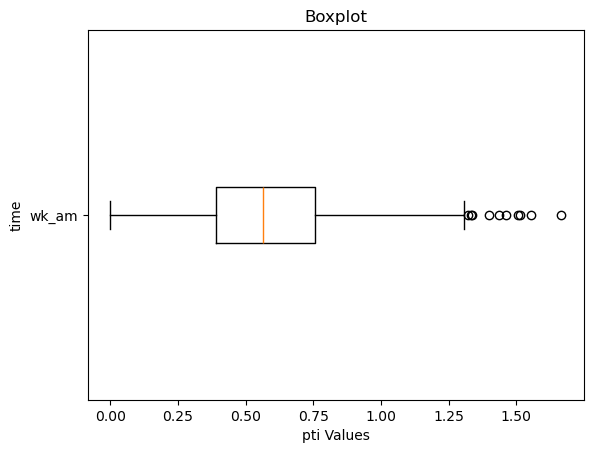

In [8]:
plt.boxplot(fi_values, labels=['wk_am'], vert=False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot')

# Show the plot
plt.show()

<Axes: xlabel='fi_2ndsqrt', ylabel='Density'>

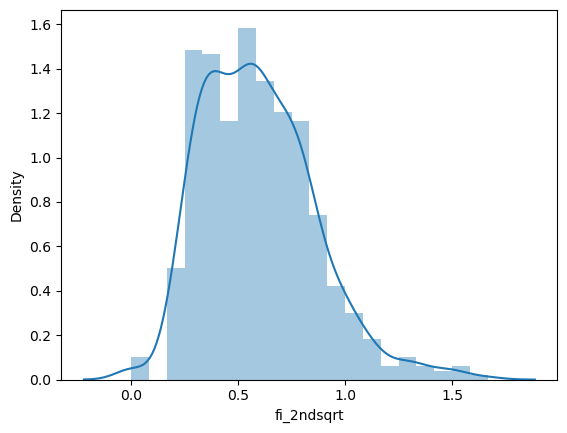

In [9]:
sns.distplot(wk_am['fi_2ndsqrt'])

<Axes: >

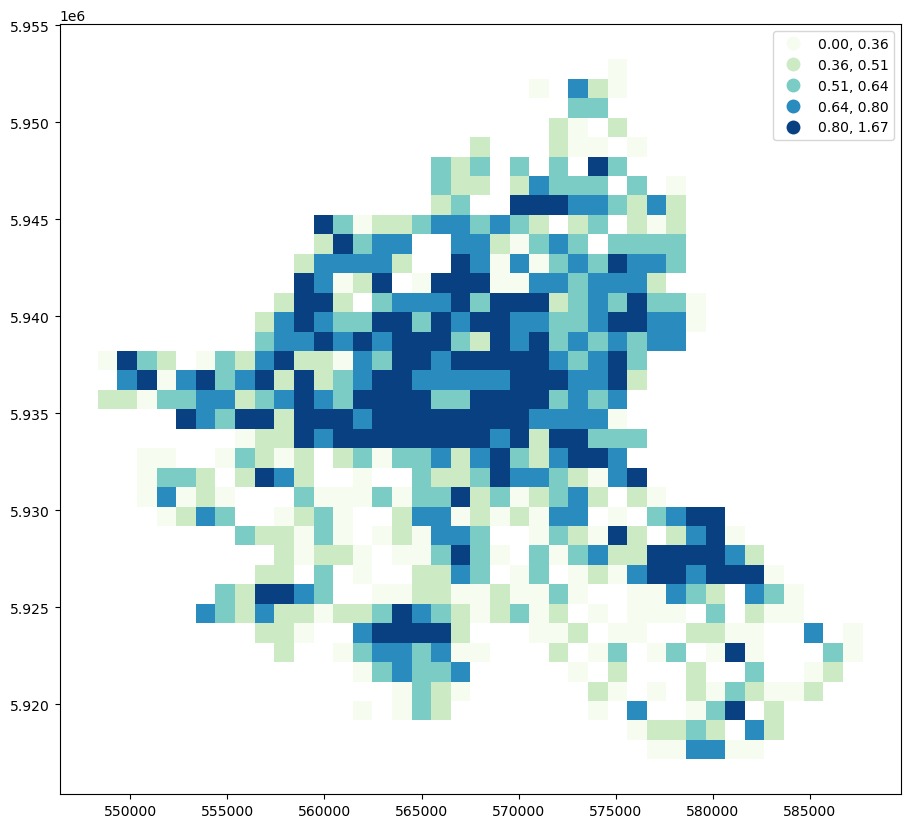

In [10]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
wk_am.plot(column='fi_2ndsqrt', scheme='Quantiles', 
        k=5, cmap='GnBu', legend=True, ax=ax)

In [11]:
wq =  lp.weights.Queen.from_dataframe(wk_am)
wq.transform = 'r'

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 355, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 393, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 424, ' is an island (no neighbors)')
('WARNING: ', 483, ' is an island (no neighbors)')
('WARNING: ', 490, ' is an island (no neighbors)')
('WARNING: ', 502, ' is an island (no neighbors)')
('WARNING: ', 521, ' is an island (no neighbors)')
('WARNING: ', 524, ' is an island (no n

In [12]:
y = wk_am['fi_2ndsqrt']
ylag = lp.weights.lag_spatial(wq, y)

In [13]:
ylag

array([0.17782794, 0.        , 0.57059304, 0.61814194, 0.23403473,
       0.48782221, 0.38943229, 0.50876673, 0.40231388, 0.        ,
       0.56234133, 0.50020654, 0.25148669, 0.80883687, 0.        ,
       0.52505331, 0.47980964, 0.45528039, 0.4728708 , 0.52671034,
       0.43070554, 0.        , 0.55373931, 0.51128792, 0.56234133,
       0.68543095, 0.80310685, 0.77950753, 0.64492844, 0.73836984,
       0.42294851, 0.40536005, 0.59220123, 0.62666411, 0.54336735,
       0.55066921, 0.54465396, 0.52009774, 0.54540768, 0.        ,
       0.44968894, 0.33097509, 0.3102683 , 0.5049267 , 0.84299082,
       0.59341077, 0.66452091, 0.65847526, 0.        , 0.48205705,
       0.6019444 , 0.71544347, 0.48861716, 0.57777568, 0.71167747,
       0.59857969, 0.66790281, 0.46865859, 0.61920791, 0.48243416,
       0.7966527 , 0.68238488, 0.51492405, 0.52482471, 0.41442296,
       0.84196657, 0.63055327, 0.47394522, 0.62656311, 0.22499143,
       0.57326568, 0.543144  , 0.84465517, 0.57478945, 0.51690

In [14]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

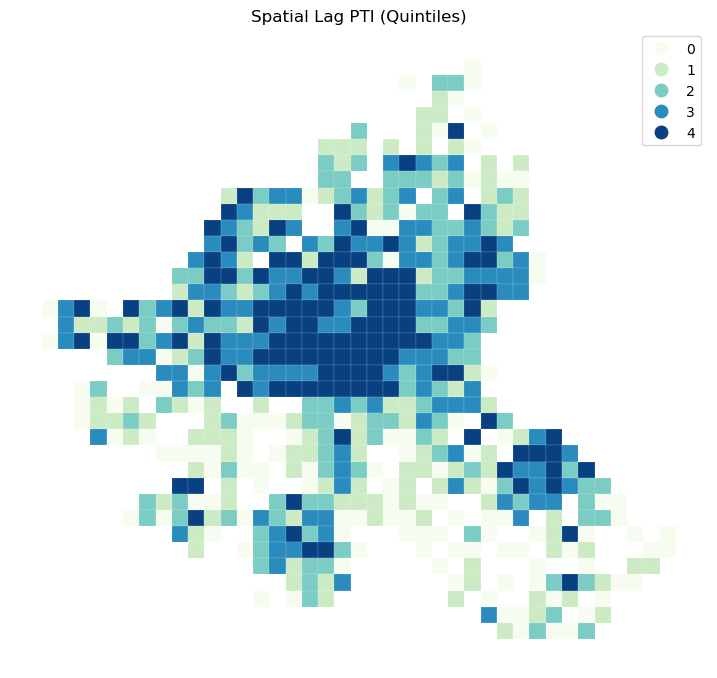

In [15]:
f,ax = plt.subplots(1, figsize=(9, 9), subplot_kw=dict(aspect='equal'))
wk_am.assign(cl=ylagq5.yb).plot(column='cl', categorical=True,
        k=5, cmap='GnBu', linewidth=0.1,
        edgecolor='white', legend=True, ax=ax)
ax.set_axis_off()
plt.title("Spatial Lag PTI (Quintiles)")

plt.show()

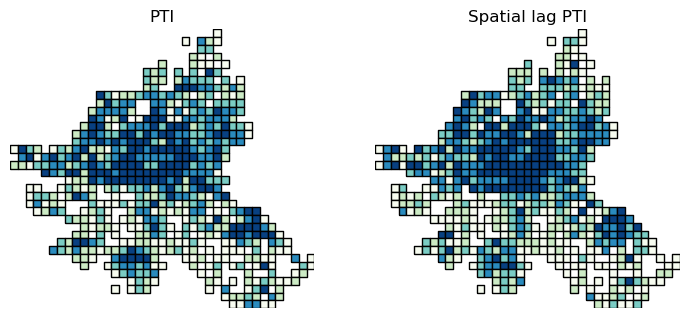

In [16]:
wk_am['lag_PTI'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4), subplot_kw=dict(aspect='equal'))
wk_am.plot(column='fi_2ndsqrt', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(wk_am.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("PTI")
wk_am.plot(column='lag_PTI', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(wk_am.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial lag PTI")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [17]:
y.median()

0.5651321867080535

In [18]:
yb = y > y.median()
sum(yb)

298

In [19]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
wk_am['yb'] = yb

<Axes: >

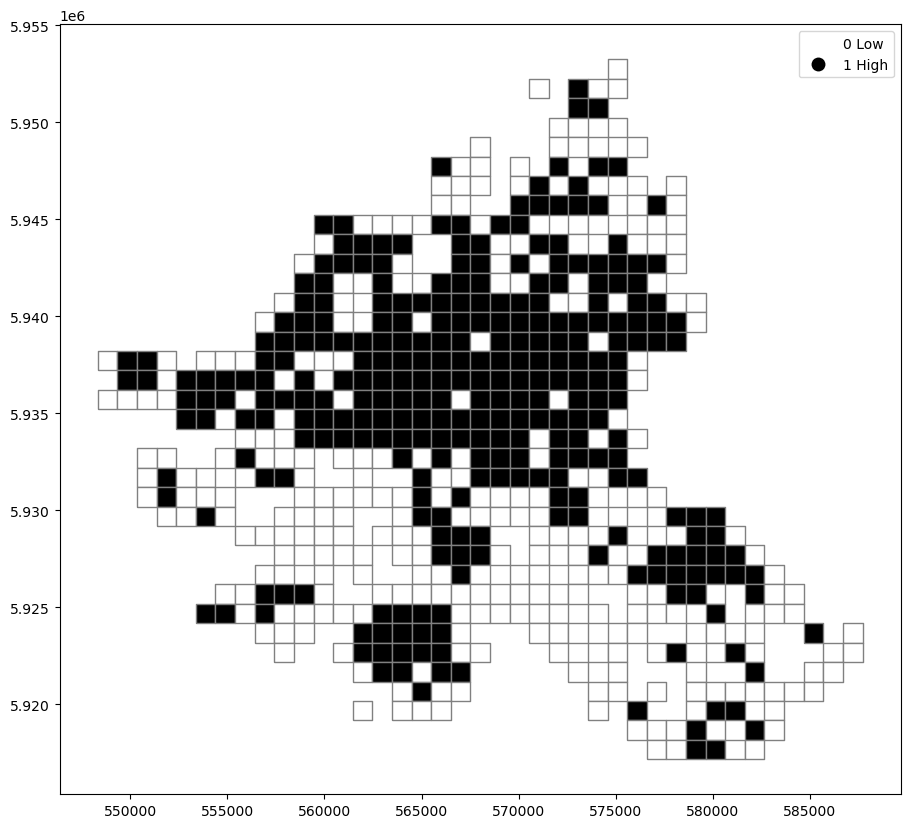

In [20]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
wk_am.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [21]:
import esda 
yb = 1 * (y > y.median()) # convert back to binary
wq =  lp.weights.Queen.from_dataframe(wk_am)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [22]:
jc.bb

187.0

In [23]:
jc.ww

124.0

In [24]:
jc.bw

169.0

In [25]:
jc.bb + jc.ww + jc.bw

480.0

In [26]:
wq.s0 / 2

480.0

In [27]:
jc.bb

187.0

In [28]:
jc.mean_bb

119.1911911911912

Text(0.5, 0, 'BB Counts')

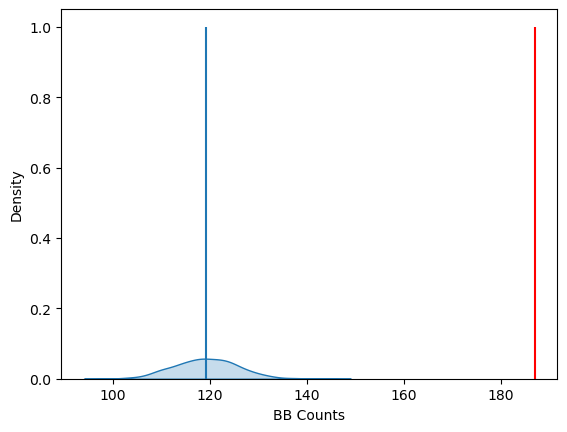

In [29]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 1, color='r')
plt.vlines(jc.mean_bb, 0,1)
plt.xlabel('BB Counts')

In [30]:
jc.p_sim_bb

0.001

In [31]:
wq.transform = 'r'

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 355, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 393, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 424, ' is an island (no neighbors)')
('WARNING: ', 483, ' is an island (no neighbors)')
('WARNING: ', 490, ' is an island (no neighbors)')
('WARNING: ', 502, ' is an island (no neighbors)')
('WARNING: ', 521, ' is an island (no neighbors)')
('WARNING: ', 524, ' is an island (no n

In [32]:
y = wk_am['fi_2ndsqrt']

In [33]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.33328568823211596

Text(0.5, 0, "Moran's I")

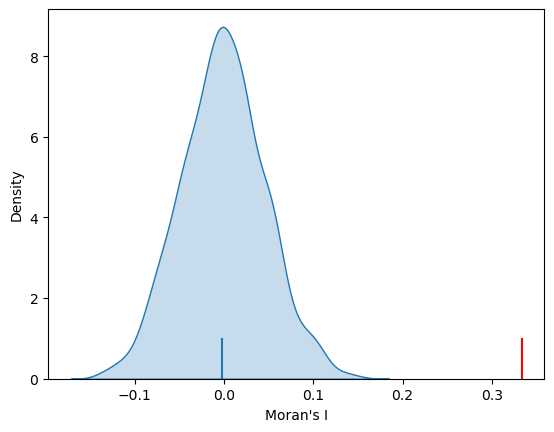

In [34]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [35]:
mi.p_sim

0.001

In [36]:
np.random.seed(12345)

In [37]:
wq.transform = 'r'
lag_pti = lp.weights.lag_spatial(wq, wk_am['fi_2ndsqrt'])

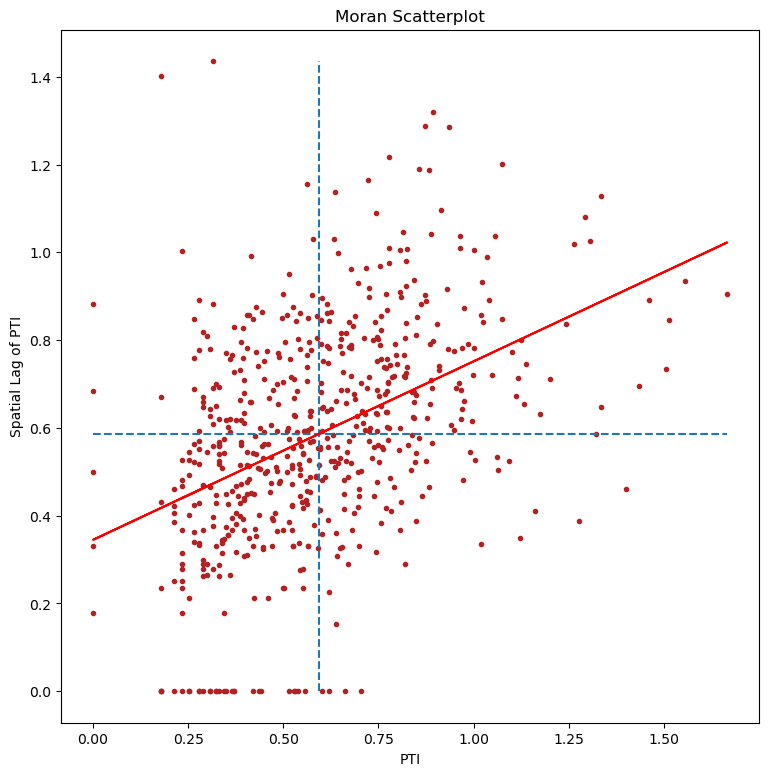

In [38]:
pti = wk_am['fi_2ndsqrt']
b, a = np.polyfit(pti, lag_pti, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(pti, lag_pti, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(pti.mean(), lag_pti.min(), lag_pti.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_pti.mean(), pti.min(), pti.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(pti, a + b*pti, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of PTI')
plt.xlabel('PTI')
plt.show()

In [39]:
li = esda.moran.Moran_Local(y, wq)

In [40]:
li.q

array([3, 3, 4, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 2, 1, 2, 1, 2, 3, 3, 3, 2, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       1, 3, 2, 2, 3, 4, 1, 2, 4, 4, 2, 2, 2, 3, 2, 3, 2, 1, 3, 4, 4, 1,
       1, 3, 2, 4, 4, 3, 1, 3, 3, 3, 2, 1, 4, 4, 1, 2, 1, 1, 3, 4, 2, 2,
       4, 2, 1, 1, 4, 3, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 2, 1, 4, 2, 1, 1,
       1, 2, 2, 1, 1, 3, 2, 1, 4, 1, 1, 1, 4, 4, 1, 2, 3, 1, 2, 1, 4, 2,
       3, 2, 4, 1, 1, 3, 2, 1, 1, 2, 1, 1, 4, 1, 1, 1, 4, 2, 1, 1, 1, 1,
       1, 3, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 2,
       1, 1, 3, 1, 1, 3, 2, 2, 2, 1, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 4, 3, 1, 4, 1, 4, 1, 2, 1, 2, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 3, 1, 1, 4, 2, 2, 4,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 4,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2,

In [41]:
(li.p_sim < 0.05).sum()

89

In [42]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [43]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

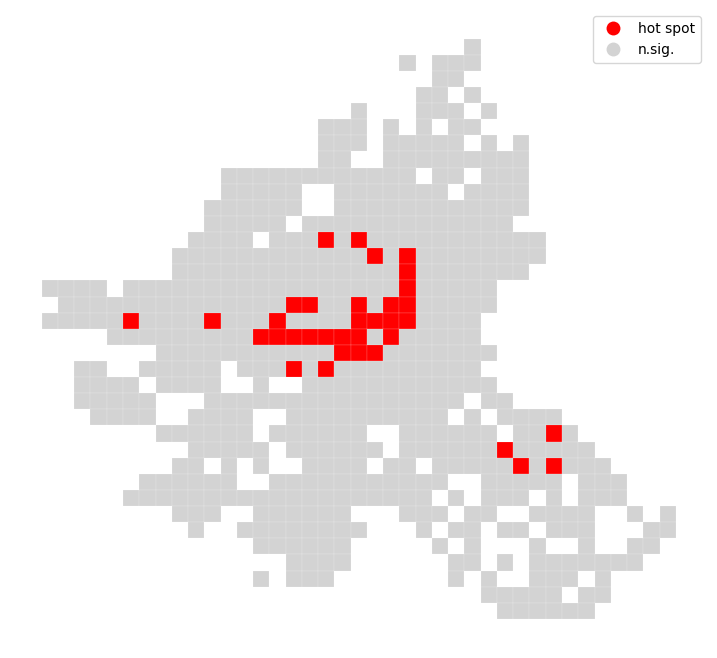

In [44]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [45]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

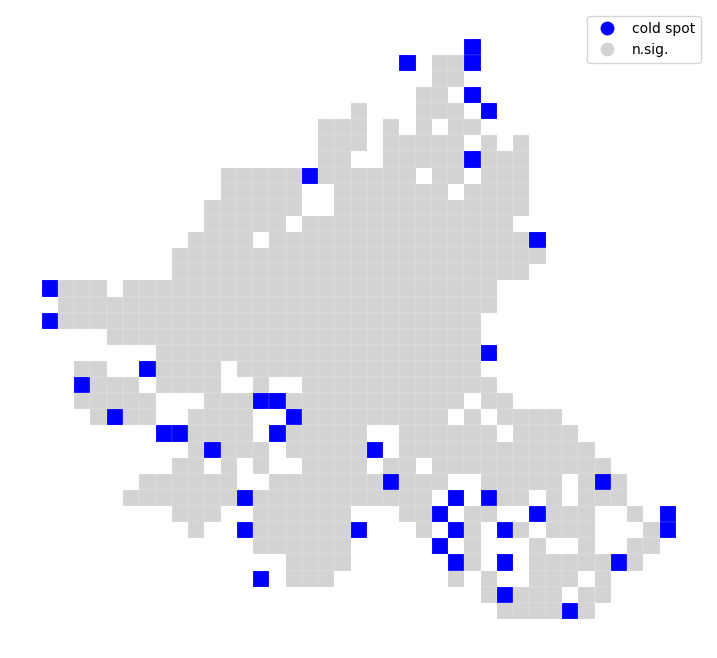

In [46]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [47]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

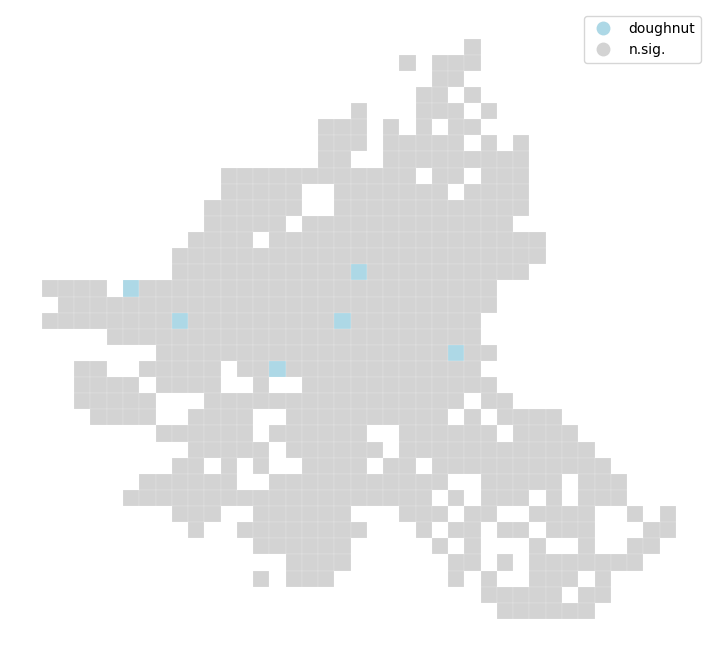

In [48]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [49]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

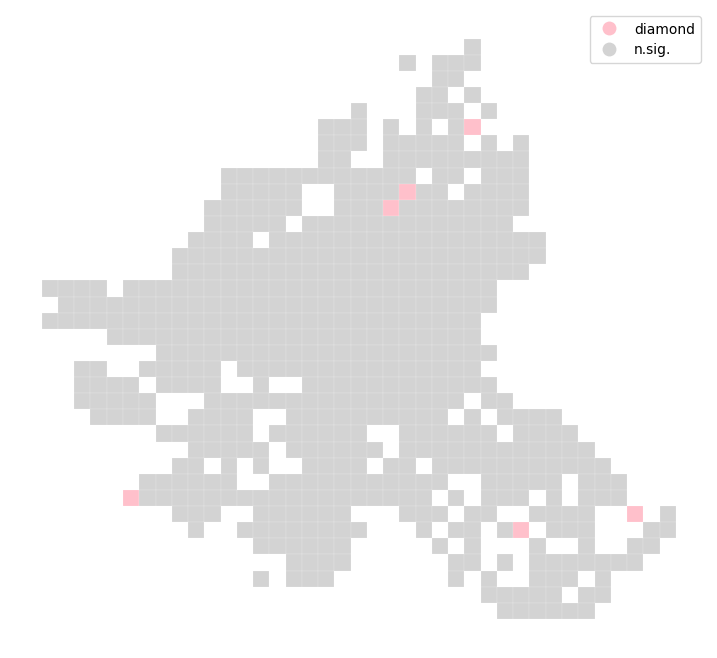

In [50]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [51]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,

In [52]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

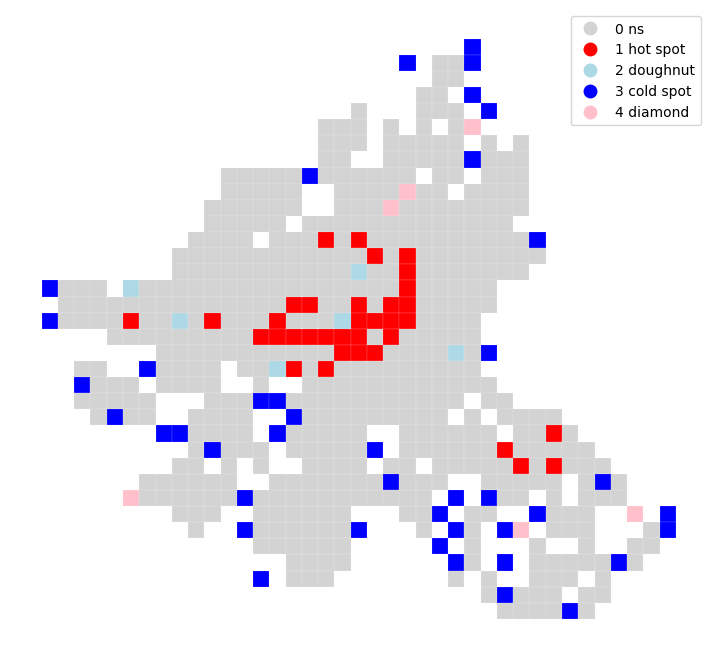

In [53]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

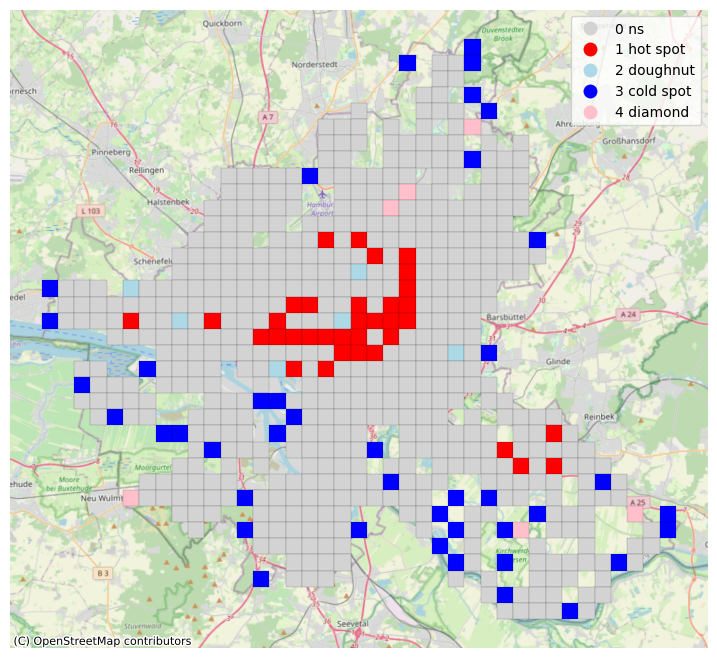

In [54]:
import contextily as ctx
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ctx.add_basemap(ax, crs=wk_am.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()